In [1]:
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import dct
from PIL import Image
from utils import *

In [4]:
mat_contents = sio.loadmat('input\TrainingSamplesDCT_8.mat')

In [5]:
bg = mat_contents['TrainsampleDCT_BG']
fg = mat_contents['TrainsampleDCT_FG']

n_bg = bg.shape[0]
n_fg = fg.shape[0]

P_FG = n_fg / (n_fg + n_bg)
P_BG = n_bg / (n_fg + n_bg)

print(f"P(Y=fg): {P_FG}")
print(f"P(Y=bg): {P_BG}")

P(Y=fg): 0.1918649270913277
P(Y=bg): 0.8081350729086723


In [6]:
bg_indices = get_second_largest_indices(bg)
fg_indices = get_second_largest_indices(fg)

bg_hist, bins = np.histogram(bg_indices, bins=np.arange(65), density=True)
fg_hist, _ = np.histogram(fg_indices, bins=np.arange(65), density=True)

plot_histogram(bg_indices,fg_indices)

NameError: name 'get_second_largest_indices' is not defined

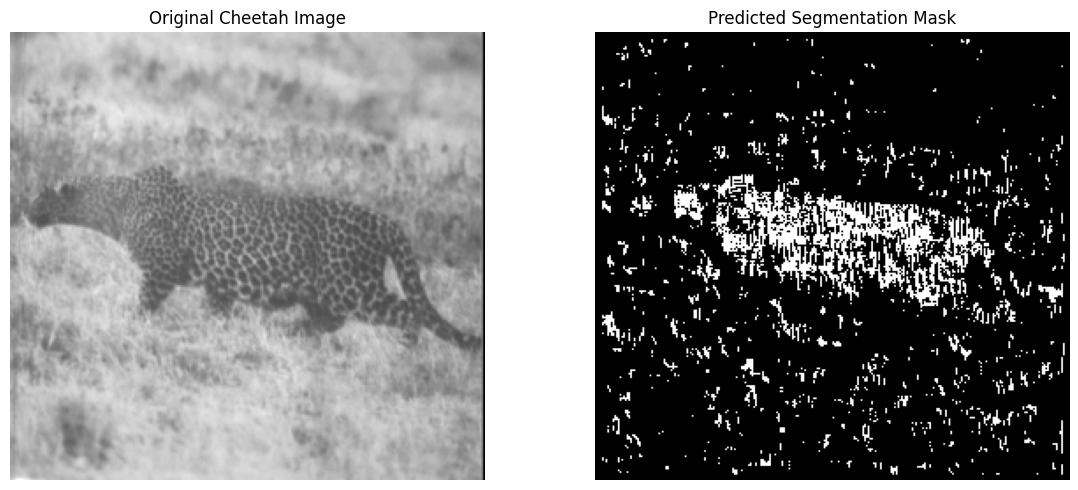

In [27]:
cheetah_img = np.array(Image.open('cheetah.bmp').convert('L'))
cheetah_img = cheetah_img.astype(np.float64) / 255.0  # Convert to doubles in [0, 1]

zigzag_pattern = create_zigzag_pattern()


# Run classification
predicted_mask = classify_cheetah_image(cheetah_img, fg_hist, bg_hist, P_FG, P_BG, zigzag_pattern)

# Visualize result
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.imshow(cheetah_img, cmap='gray')
plt.title('Original Cheetah Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(predicted_mask, cmap='gray')
plt.title('Predicted Segmentation Mask')
plt.axis('off')
plt.tight_layout()
plt.show()

# Save the result
result_img = Image.fromarray((predicted_mask * 255).astype(np.uint8))
result_img.save('cheetah_predicted_mask.bmp')


Probability of Error: 0.171503
Accuracy: 82.85%


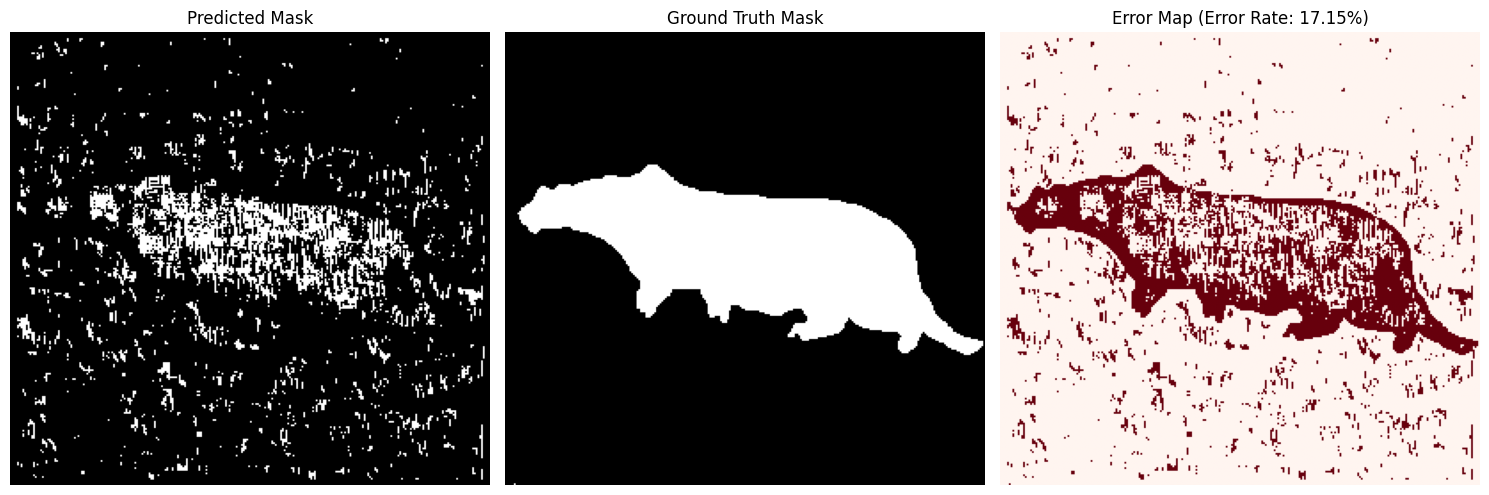

In [28]:
# Load ground truth mask
ground_truth = np.array(Image.open('cheetah_mask.bmp').convert('L')) / 255.0

# Ensure same dimensions
min_h = min(predicted_mask.shape[0], ground_truth.shape[0])
min_w = min(predicted_mask.shape[1], ground_truth.shape[1])

pred_crop = predicted_mask[:min_h, :min_w]
truth_crop = ground_truth[:min_h, :min_w]

# Convert to binary
pred_binary = (pred_crop > 0.5).astype(int)
truth_binary = (truth_crop > 0.5).astype(int)

# Compute error
errors = np.sum(pred_binary != truth_binary)
total_pixels = pred_binary.size
error_probability = errors / total_pixels

print(f"Probability of Error: {error_probability:.6f}")
print(f"Accuracy: {(1 - error_probability) * 100:.2f}%")

# Visualize comparison
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.imshow(pred_binary, cmap='gray')
plt.title('Predicted Mask')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(truth_binary, cmap='gray')
plt.title('Ground Truth Mask')
plt.axis('off')

plt.subplot(1, 3, 3)
error_map = np.abs(pred_binary - truth_binary)
plt.imshow(error_map, cmap='Reds')
plt.title(f'Error Map (Error Rate: {error_probability:.2%})')
plt.axis('off')
plt.tight_layout()
plt.show()
